In [6]:
# import uproot
# import coffea
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, DelphesSchema#, NanoAODSchema
import pandas as pd
import numpy as np
import os

In [172]:
import vector
def packVector3D(pt,phi,eta):
    vec3d = ak.Array(
        {
            "rho": pt,
            "phi": phi,
            "eta": eta,
        },
        with_name="Vector3D"
    )
    return vec3d

In [173]:
# eventLHE =  NanoEventsFactory.from_root(
#     "samples/whg_lo_pp_vlh_decayed.root",
#     treepath="LHEF",
# ).events()

In [ ]:
events = NanoEventsFactory.from_root(
    # "samples/whgbkg1_p.root",
    # "samples/bbmasstest.root",
    # "samples/btest.root",
    "samples/whg_lo_pp_vlh_decay_dd.root",
    schemaclass=DelphesSchema,
    treepath="Delphes",
).events()
eve_dic={}
for branch in events.fields:
    eve_dic[branch] = events[branch]
eve_ak = ak.Array(eve_dic)


In [7]:
def readDelphes(name):
    events = NanoEventsFactory.from_root(
        name,
        schemaclass=DelphesSchema,
        treepath="Delphes",
    ).events()
    return events

In [175]:
flavor=events["Jet"].Flavor

In [ ]:
Photon = ak.copy(events.Photon)
Electron = ak.copy(events.Electron)
# 确保两个数组都不为空
has_photon = ak.num(Photon, axis=1) > 0
has_electron = ak.num(Electron, axis=1) > 0
has_both = has_photon & has_electron

# 只对有 photon 和 electron 的事件计算
photon_with_both = Photon[has_both]
electron_with_both = Electron[has_both]

if ak.sum(has_both) > 0:
    photon_electron_pairs = ak.cartesian([photon_with_both, electron_with_both], axis=1)
    delta_r_result = photon_electron_pairs['0'].delta_r(photon_electron_pairs['1'])
    print("有效事件的 photon-electron delta_r:")
    print(delta_r_result)
else:
    print("没有同时包含 photon 和 electron 的事件")


In [ ]:
print(flavor)

[[5, 4, 5, 2, 3, 21], [21, 5, 1, 4, 2, 5, ... 1, 2, 1, 2, 0, 21], [0, 5, 0, 4, 0, 3]]


In [ ]:
btag= events["Jet"].BTag

In [ ]:
print("btag",btag & 2)
print(ak.sum(btag>1))
type(btag[1][1])

btag [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], ... 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
0


int

In [ ]:
print((btag>>4)&1)

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], ... 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [ ]:
events.fields

['EFlowPhoton.offsets',
 'EFlowPhoton',
 'Photon.offsets',
 'Photon',
 'ScalarHT.offsets',
 'ScalarHT',
 'FatJet.offsets',
 'FatJet',
 'Tower.offsets',
 'Tower',
 'EFlowNeutralHadron.offsets',
 'EFlowNeutralHadron',
 'Weight.offsets',
 'Weight',
 'GenMissingET.offsets',
 'GenMissingET',
 'GenJet.offsets',
 'GenJet',
 'MissingET.offsets',
 'MissingET',
 'EFlowTrack.offsets',
 'EFlowTrack',
 'Particle.offsets',
 'Particle',
 'Track.offsets',
 'Track',
 'Muon.offsets',
 'Muon',
 'Electron.offsets',
 'Electron',
 'Jet.offsets',
 'Jet',
 'Event.offsets',
 'Event']

some function usage examples

In [ ]:
def countItem(arr, item):
    count = 0
    for i in arr:
        if i == item:
            count += 1
    return count
import awkward as ak

def mergeAndMasks(*masks):
    """Merge multiple awkward boolean masks with logical AND."""
    if len(masks) == 0:
        raise ValueError("At least one mask is required")
    
    merged_mask = masks[0]
    for mask in masks[1:]:
        merged_mask = merged_mask & mask
    return merged_mask

def mergeOrMasks(*masks):
    """OR-combine boolean masks."""
    if len(masks) == 0:
        raise ValueError("At least one mask is required")
    
    merged_mask = masks[0]
    for mask in masks[1:]:
        merged_mask = merged_mask | mask  # Use | instead of 'or' for element-wise operation
    return merged_mask

def mergeXorMasks(mask1, mask2):
    """
    Merge two boolean masks using logical XOR operation.
    Result is True when exactly one of the masks is True.
    
    Args:
        mask1: First boolean awkward array
        mask2: Second boolean awkward array
        
    Returns:
        awkward array: Combined mask using XOR operation
    """
    merged_mask = mask1 ^ mask2
    return merged_mask

# Additional utility functions for mask operations
def mergeNotMask(mask):
    """Invert a boolean mask."""
    return ~mask

def countPassingEvents(mask):
    """Count True entries in a mask."""
    return ak.sum(mask==True)

def getEfficiency(mask, total_events=None):
    """Compute mask efficiency (passing/total)."""
    passing = ak.sum(mask==True)
    total = total_events if total_events is not None else len(mask)
    return float(passing) / float(total)

def combineMasks(masks_dict, operation='and'):
    """Combine named masks with AND/OR."""
    mask_list = list(masks_dict.values())
    op = operation.lower()
    if op == 'and':
        return mergeAndMasks(*mask_list)
    elif op == 'or':
        return mergeOrMasks(*mask_list)
    else:
        raise ValueError("Operation must be 'and' or 'or'")

print("Enhanced mask functions loaded successfully!")

Enhanced mask functions loaded successfully!


Cuts define:

In [ ]:
def goodLepton(events, pt_cut=10.0, eta_cut=2.5):
    """
    安全的轻子选择，只使用基本动力学变量
    """
    # good_electron_mask = ak.zeros_like(events.event, dtype=bool)
    # good_muon_mask = ak.zeros_like(events.event, dtype=bool)
    
    # 安全处理电子
    if "Electron" in events.fields:
        try:
            electron_count = ak.num(events.Electron, axis=1)
            if ak.max(electron_count) > 0:
                e_pt = events.Electron.PT
                e_eta = events.Electron.Eta
                
                e_cuts = (e_pt > pt_cut) & (np.abs(e_eta) < eta_cut)
                good_electron_mask = e_cuts
                print(f"[GOODLEP] Processed {ak.sum(electron_count)} electrons successfully")
        except Exception as e:
            print(f"Skipping electrons due to error: {e}")
    
    # 安全处理缪子
    if "Muon" in events.fields:
        try:
            muon_count = ak.num(events.Muon, axis=1)
            if ak.max(muon_count) > 0:
                mu_pt = events.Muon.PT
                mu_eta = events.Muon.Eta
                
                mu_cuts = (mu_pt > pt_cut) & (np.abs(mu_eta) < eta_cut)
                good_muon_mask = mu_cuts
                print(f"[GOODLEP] Processed {ak.sum(muon_count)} muons successfully")
        except Exception as e:
            print(f"Skipping muons due to error: {e}")
    
    return good_electron_mask, good_muon_mask

def goodPhoton(events, pt_cut=0.0, eta_cut=2.5):
    """ select Photon with |eta| < etacut(2.5) and PT > ptcut(10.0) """
    Photon = ak.copy(events.Photon)
    exist_mask = ak.num(Photon, axis=1) > 0
    ptcut = Photon.PT > pt_cut           # PT > 0 GeV
    etacut = np.abs(Photon.Eta) < eta_cut  # |eta| < 2.5
    good_photon_cut = ptcut & etacut
    has_good_photon = ak.any(good_photon_cut, axis=1)
    mask = exist_mask & has_good_photon
    return mask

In [ ]:
def missptOverCut(events, cut):
    # Check if MissingET.MET is greater than threshold
    mask = events["MissingET"].MET > cut
    return mask

def containBjet(events, num):
    #Check if events contain exactly the specified number of b-tagged jets
    Btag = events["Jet"].BTag
    btag_count = ak.sum(Btag == 1, axis=1)
    mask = btag_count == num
    return mask

def containOverBjet(events, num):
    #Check if events contain exactly the specified number of b-tagged jets
    Btag = events["Jet"].BTag
    btag_count = ak.sum(Btag == 1, axis=1)
    mask = btag_count >= num
    return mask

def countElectron(events):
    #Count the number of electrons in each event (both positive and negative charges)
    # Use ak.num to directly count electrons in each event
    electron_count = ak.num(events["Electron"], axis=1)
    return electron_count

def countMuon(events):
    #Count the number of muons in each event (both positive and negative charges)
    # Use ak.num to directly count muons in each event
    muon_count = ak.num(events["Muon"], axis=1)
    return muon_count

def leptonTrigger(events):
    #Check if events have exactly 1 lepton (electron + muon total = 1)
    electron_count = ak.num(events["Electron"], axis=1)
    muon_count = ak.num(events["Muon"], axis=1)
    total_lepton_count = electron_count + muon_count
    mask = total_lepton_count == 1
    return mask

def singleLeptonTrigger(events):
    # Check if events have exactly 1 good lepton (electron or muon)
    good_electron_mask, good_muon_mask = goodLepton(events)
    good_electron_count = ak.sum(good_electron_mask, axis=1)
    good_muon_count = ak.sum(good_muon_mask, axis=1)
    total_good_lepton_count = good_electron_count + good_muon_count
    mask = total_good_lepton_count == 1
    return mask

def tightElectron(events, cut):
    #Check if events have exactly 1 electron with PT > cut
    electron_pt = events["Electron"].PT
    # Count electrons with PT > cut in each event
    tight_electron_count = ak.sum(electron_pt > cut, axis=1)
    mask = tight_electron_count == 1
    return mask

def tightMuon(events, cut):
    # Check if events have exactly 1 muon with PT > cut
    muon_pt = events["Muon"].PT
    # Count muons with PT > cut in each event
    tight_muon_count = ak.sum(muon_pt > cut, axis=1)
    mask = tight_muon_count == 1
    return mask

print("Functions loaded successfully")


Functions loaded successfully


In [ ]:
goodElectron, goodMuon = goodLepton(events,pt_cut=0.0, eta_cut=1)
goodPhotonMask = goodPhoton(events)
print("Good Electron mask:", goodElectron)
print("Good Muon mask:", goodMuon)
print("Good Photon mask:", goodPhotonMask)
# plt.hist(ak.sum(goodElectron==True, axis=1))
Photon = ak.copy(events.Photon)
exist_mask = ak.num(Photon, axis=1) > 0
print(getEfficiency(exist_mask))

[GOODLEP] Processed 136 electrons successfully
[GOODLEP] Processed 131 muons successfully
Good Electron mask: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
Good Muon mask: [[], [], [], [], [True], [True], [], [], ... [], [], [], [True], [], [], [], []]
Good Photon mask: [False, False, True, True, False, True, ... True, False, False, True, True, True]
0.528


In [ ]:
mask_signleLepton = singleLeptonTrigger(events)
print("Single lepton trigger mask:", mask_signleLepton)
mask_photon = goodPhoton(events)
print("Good photon mask:", mask_photon)
print(getEfficiency(mask_signleLepton & mask_photon)*100, "%")
print((mask_signleLepton & mask_photon)[40:50])

[GOODLEP] Processed 136 electrons successfully
[GOODLEP] Processed 131 muons successfully
Single lepton trigger mask: [False, False, False, False, True, True, ... False, True, False, False, False, False]
Good photon mask: [False, False, True, True, False, True, ... True, False, False, True, True, True]
11.5 %
[False, False, False, False, True, False, False, False, False, False]


In [ ]:
# btag=events['Jet'].BTag
# ak.num(btag, axis=1)
# local_index = ak.local_index(btag)
# combination

In [ ]:
def getWMass(events):
    missMET = events["MissingET"].MET
    missPhi = events["MissingET"].Phi
    ###
    # because we has limit lepton == 1, we just sum lepton PT and phi
    ###
    leptonPT = ak.sum(events["Electron"].PT, axis=1) + ak.sum(events["Muon"].PT, axis=1)
    leptonPhi = ak.sum(events["Electron"].Phi, axis=1) + ak.sum(events["Muon"].Phi, axis=1)
    ###
    # Reconstruct the transverse mass of W boson
    ###
    W_mass = np.sqrt(2 * leptonPT * missMET * (1 - np.cos(leptonPhi - missPhi)))
    return W_mass

def getBBmass(events):
    bjets = events["Jet"][events["Jet"].BTag == 1]
    bjets = bjets[ak.argsort(bjets.PT, axis=1, ascending=False)]
    leading2 = bjets[:, :2]
    px = leading2.PT * np.cos(leading2.Phi)
    py = leading2.PT * np.sin(leading2.Phi)
    pz = leading2.PT * np.sinh(leading2.Eta)
    E  = np.sqrt(leading2.Mass**2 + px**2 + py**2 + pz**2)
    px_sum = ak.sum(px, axis=1)
    py_sum = ak.sum(py, axis=1)
    pz_sum = ak.sum(pz, axis=1)
    E_sum  = ak.sum(E,  axis=1)
    mass2 = E_sum**2 - px_sum**2 - py_sum**2 - pz_sum**2
    bbmass = np.sqrt(np.maximum(mass2, 0))  # 防止负数开根号
    return bbmass

def getBBmassValid(events):
    # select b-jets: BTag == 1, PT > 25, |eta| < 2.5
    bjets = events["Jet"][
        (events["Jet"].BTag == 1) & 
        (events["Jet"].PT > 25) & 
        (np.abs(events["Jet"].Eta) < 2.5)
    ]
    # 按 PT 降序排列（确保取到最高PT的b喷注）
    bjets = bjets[ak.argsort(bjets.PT, axis=1, ascending=False)]
    leading2 = bjets[:, :2]

    px = leading2.PT * np.cos(leading2.Phi)
    py = leading2.PT * np.sin(leading2.Phi)
    pz = leading2.PT * np.sinh(leading2.Eta)
    E = np.sqrt(leading2.Mass**2 + px**2 + py**2 + pz**2)

    px_sum = ak.sum(px, axis=1)
    py_sum = ak.sum(py, axis=1)
    pz_sum = ak.sum(pz, axis=1)
    E_sum = ak.sum(E, axis=1)

    mass2 = E_sum**2 - px_sum**2 - py_sum**2 - pz_sum**2
    bb_mass = np.sqrt(np.maximum(mass2, 0))
    
    return bb_mass    

def getBBAmass(events):
    bjets = events["Jet"][events["Jet"].BTag == 1]
    bjets = bjets[ak.argsort(bjets.PT, axis=1, ascending=False)]
    leading2 = bjets[:, :2]
    photon = events["Photon"]
    px_a = photon.PT * np.cos(photon.Phi)
    py_a = photon.PT * np.sin(photon.Phi)
    pz_a = photon.PT * np.sinh(photon.Eta)
    E_a  = np.sqrt(px_a**2 + py_a**2 + pz_a**2)  
    px = leading2.PT * np.cos(leading2.Phi)
    py = leading2.PT * np.sin(leading2.Phi)
    pz = leading2.PT * np.sinh(leading2.Eta)
    E  = np.sqrt(leading2.Mass**2 + px**2 + py**2 + pz**2)
    px_sum = ak.sum(px, axis=1)
    py_sum = ak.sum(py, axis=1)
    pz_sum = ak.sum(pz, axis=1)
    E_sum  = ak.sum(E,  axis=1)
    # add photon four-vector components
    px_sum = px_sum + ak.sum(px_a, axis=1)  
    py_sum = py_sum + ak.sum(py_a, axis=1) 
    pz_sum = pz_sum + ak.sum(pz_a, axis=1)  
    E_sum  = E_sum + ak.sum(E_a, axis=1)    
    mass2 = E_sum**2 - px_sum**2 - py_sum**2 - pz_sum**2
    bba_mass = np.sqrt(np.maximum(mass2, 0))  # 防止负数开根号
    return bba_mass

def getNjet(events):
    # get the number of jets in each event
    njet = ak.num(events["Jet"].BTag, axis=1)
    return njet
    
def fab(phi):
    # ensure phi is in the range [-π, π]
    phi = np.where(phi > np.pi, phi - 2 * np.pi, phi)
    phi = np.where(phi < -np.pi, phi + 2 * np.pi, phi)
    return np.abs(phi)

def getDBjetDeltaSet(events):
    ## get LO two b jet: Delta R, Delta Eta, and Delta Phi
    bjets = events["Jet"][events["Jet"].BTag == 1]
    bjets = bjets[ak.argsort(bjets.PT, axis=1, ascending=False)]
    has_2bjets = ak.num(bjets, axis=1) >= 2
    bjets_padded = ak.pad_none(bjets, 2, axis=1)
    bjet1 = bjets_padded[:, 0]
    bjet2 = bjets_padded[:, 1]
    # Delta R
    delta_r = ak.where(
        has_2bjets,
        bjet1.delta_r(bjet2),
        np.nan
    )
    # Delta Eta
    delta_eta = ak.where(
        has_2bjets,
        np.abs(bjet1.Eta - bjet2.Eta),
        np.nan
    )
    # Delta Phi 
    delta_phi = ak.where(
        has_2bjets,
        fab(bjet1.Phi - bjet2.Phi),
        np.nan
    )
    return delta_r, delta_eta, delta_phi

def getPhotonEnergy(events, return_type='leading'):
    ## get Photon energy based on the specified return type
    photons = events["Photon"]
    
    if return_type == 'all':
        return photons.E
    elif return_type == 'leading':
        photons_sorted = photons[ak.argsort(photons.PT, axis=1, ascending=False)]
        has_photons = ak.num(photons_sorted, axis=1) > 0
        photons_padded = ak.pad_none(photons_sorted, 1, axis=1)
        return ak.where(
            has_photons,
            photons_padded[:, 0].E,
            np.nan
        )
    else:
        total_energy = ak.sum(photons.E, axis=1)
        return ak.fill_none(total_energy, 0.0)

def getHiggsFromDBjet(events):
    ## reconstruct Higgs boson from two leading b-jets
    bjets = events["Jet"][events["Jet"].BTag == 1]
    bjets = bjets[ak.argsort(bjets.PT, axis=1, ascending=False)]
    has_2bjets = ak.num(bjets, axis=1) >= 2
    leading2 = ak.pad_none(bjets, 2, axis=1)[:, :2]
    
    px = leading2.PT * np.cos(leading2.Phi)
    py = leading2.PT * np.sin(leading2.Phi)
    pz = leading2.PT * np.sinh(leading2.Eta)
    E  = np.sqrt(leading2.Mass**2 + px**2 + py**2 + pz**2)
    
    px_sum = ak.sum(px, axis=1)
    py_sum = ak.sum(py, axis=1)
    pz_sum = ak.sum(pz, axis=1)
    E_sum  = ak.sum(E,  axis=1)

    mass2 = E_sum**2 - px_sum**2 - py_sum**2 - pz_sum**2
    higgs_mass = np.sqrt(np.maximum(mass2, 0))
    higgs_pt = np.sqrt(px_sum**2 + py_sum**2)
    higgs_eta = np.arcsinh(pz_sum / higgs_pt)
    higgs_phi = np.arctan2(py_sum, px_sum)

    higgs = ak.zip({
        "PT": ak.where(has_2bjets, higgs_pt, np.nan),
        "Eta": ak.where(has_2bjets, higgs_eta, np.nan),
        "Phi": ak.where(has_2bjets, higgs_phi, np.nan),
        "Mass": ak.where(has_2bjets, higgs_mass, np.nan),
        "E": ak.where(has_2bjets, E_sum, np.nan),
        "PX": ak.where(has_2bjets, px_sum, np.nan),
        "PY": ak.where(has_2bjets, py_sum, np.nan),
        "PZ": ak.where(has_2bjets, pz_sum, np.nan)
    }, with_name="Momentum4D")
    
    return higgs

def deltaR(obj1_eta, obj1_phi, obj2_eta, obj2_phi):
    """Calculate delta R between two objects"""
    delta_eta = obj1_eta - obj2_eta
    delta_phi = fab(obj1_phi - obj2_phi)
    
    return np.sqrt(delta_eta**2 + delta_phi**2)
def getHiggsPhotonDeltaR(events):
    ## calculate the delta R between Higgs and leading photon
    higgs = getHiggsFromDBjet(events)
    photons = events["Photon"]

    has_photons = ak.num(photons, axis=1) > 0
    has_higgs = ~ak.is_none(higgs.PT) & ~np.isnan(higgs.PT)

    photons_padded = ak.pad_none(photons, 1, axis=1)
    photon1 = photons_padded[:, 0]
    delta_r = ak.where(
        has_photons & has_higgs,
        deltaR(higgs.Eta, higgs.Phi, photon1.Eta, photon1.Phi),
        np.nan
    )
    return delta_r

print("Utility functions loaded successfully!") 

cut Events

In [ ]:

def eventCut(events, name="default"):
    maskPhoton = goodPhoton(events)
    maskmisspt = missptOverCut(events, 30)
    maskBjets = containOverBjet(events, 1)
    maskLepTrig = leptonTrigger(events)
    
    maskElec = tightElectron(events, 30)
    maskMuon = tightMuon(events, 26)
    maskLepPT = mergeOrMasks(maskElec, maskMuon)
    mask_list = (
        maskPhoton, 
        maskmisspt, 
        maskBjets, 
        maskLepTrig, 
        maskLepPT
    )
    merged_mask = mergeAndMasks(mask_list)

    cutnum = countItem(merged_mask, True)
    text= f"[CUTTER] {name} Before cut: {len(events)} events, After cut: {cutnum} events"
    print(text)
    return merged_mask

# events = events[merged_mask]

In [5]:
def saveAsNPY(result, filename):
    """
    Save the result as a numpy file.
    """
    np.save(filename, ak.to_numpy(result))
    print(f"Events saved to {filename}")

In [ ]:
def analyzeEvents(events, mask, cut_name="default", path=""):
    ## Analyze events and return results
    print(f"[ANALYZE] Analyzing events with cut: {cut_name}")
    
    # 应用掩码
    events_cut = events[mask]
    n_events = len(events_cut)
    
    if n_events == 0:
        print(f"[WARNING] No events pass the cut: {cut_name}")
        return None
    
    # 计算各种物理量
    w_mass = getWMass(events_cut)
    bbMass = getBBmass(events_cut)
    bbaMass = getBBAmass(events_cut)
    njet = getNjet(events_cut)
    dB_delta_r, dB_delta_eta, dB_delta_phi = getDBjetDeltaSet(events_cut)
    bP_delta_r = getHiggsPhotonDeltaR(events_cut)
    photon_energy = getPhotonEnergy(events_cut, return_type='leading')
    
    print(f"[ANALYZE] Analyzed {n_events} events with cut: {cut_name} Done")
    
    result = {
        "W_mass": w_mass,
        "BB_mass": bbMass,
        "BBA_mass": bbaMass,
        "Njet": njet,
        "dB_delta_r": dB_delta_r,
        "dB_delta_eta": dB_delta_eta,
        "dB_delta_phi": dB_delta_phi,
        "bP_delta_r": bP_delta_r,
        "photon_energy": photon_energy
    }
    
    # DataFrame
    df = saveResultsEBE(result, cut_name=cut_name, path=path)
    return result

def saveResultsEBE(result, cut_name="default", path=""):
    """将结果保存为 Pandas DataFrame"""

    
    print(f"[SAVE] Converting results to DataFrame...")

    df_data = {}
    for key, value in result.items():
        try:
            if hasattr(value, 'to_numpy'):
                np_array = ak.to_numpy(value, allow_missing=True)
            else:
                np_array = np.asarray(value)
            if np_array.ndim > 1:
                np_array = np_array.flatten()
            df_data[key] = np_array
            
        except Exception as e:
            print(f"[WARNING] Could not convert {key}: {e}")
            continue
    
    # DataFrame
    df = pd.DataFrame(df_data)
    if path:
        os.makedirs(path, exist_ok=True)
        filename = os.path.join(path, f"analysis_{cut_name}.parquet")
    else:
        filename = f"analysis_{cut_name}.parquet"
    
    df.to_parquet(filename)
    print(f"[SAVE] DataFrame saved to: {filename}")
    print(f"[SAVE] Shape: {df.shape}, Columns: {list(df.columns)}")
    
    return df


In [ ]:
event_btag = ak.sum(events["Jet"].BTag, axis=1)


(0.0, 5.0)

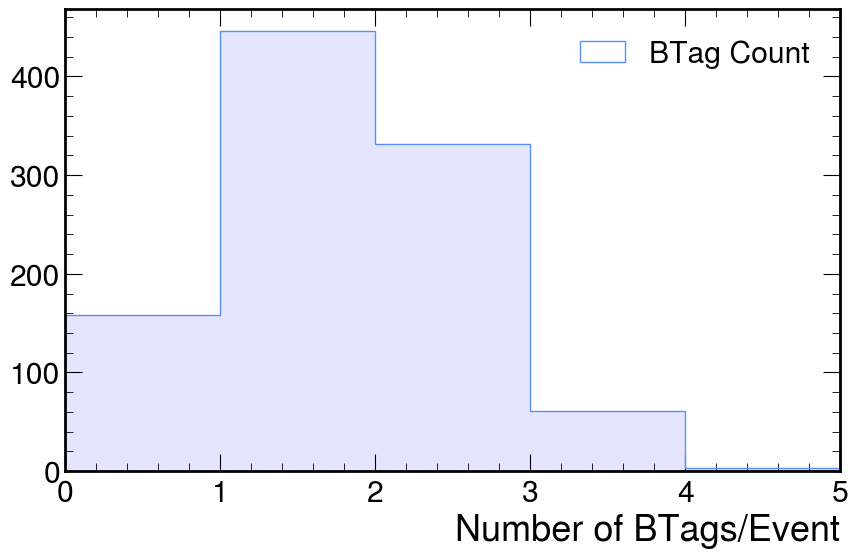

In [ ]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.figure(figsize=(10, 6))
plt.hist(event_btag, bins=10, range=(0, 10), histtype='step', label='BTag Count') 
plt.hist(event_btag, bins=10, range=(0, 10), color='blue', alpha=0.1)
plt.xlabel('Number of BTags/Event')
plt.legend()
plt.xlim(0, 5)


In [ ]:
maskmisspt = missptOverCut(events, 30)
maskBjets = containBjet(events, 1)
maskLepTrig = leptonTrigger(events)

maskElec = tightElectron(events, 30)
maskMuon = tightMuon(events, 26)
maskLepPT = mergeOrMasks(maskElec, maskMuon)
maskPhoton = goodPhoton(events)
merged_mask = mergeAndMasks(maskmisspt, maskBjets, maskLepTrig, maskPhoton)

cutnum = countItem(merged_mask, True)
text= f"Before cut: {len(events)} events, After cut: {len(events[merged_mask])} events"
print(text)

Before cut: 1000 events, After cut: 49 events


In [ ]:
event_cut_mask = eventCut(events)
events_cut = events[event_cut_mask]
W_mass = getWMass(events_cut)
bb_mass = getBBmass(events_cut)
bb_deltaR = getDBjetDeltaR(events_cut)
# print(bb_mass)
# bjetmask = events_cut["Jet"].BTag == 1 
# print(bjetmask)
# using slicing
# first_bjet_pt = events_cut["Jet"].PT[bjetmask][:, 0]
# print(first_bjet_pt)


# saveAsNPY(bb_mass, "bb_mass.npy")


[CUTTER] Before cut: 1000 events, After cut: 141 events


In [ ]:
# bb_mass = np.load("bb_mass.npy")

Text(1, 0, '$M_{b\\bar{b}\\gamma}$ (GeV)')

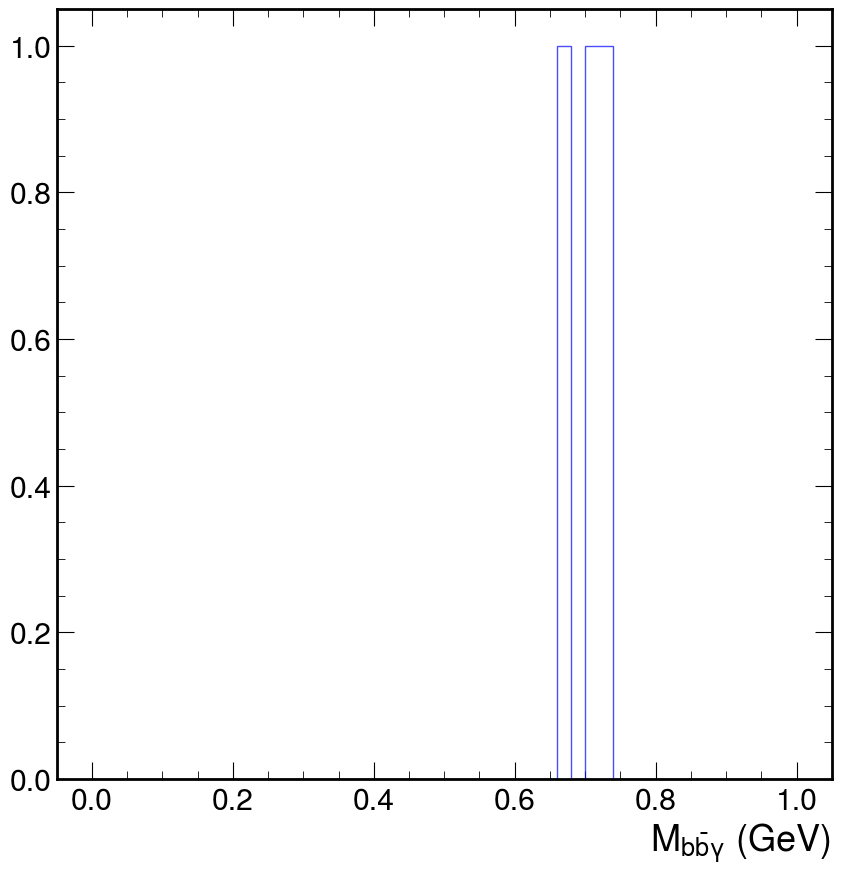

In [ ]:
plt.hist(bb_deltaR, bins=50, range=(0, 1), label='bb mass', histtype='step', color='blue', alpha=0.7)
plt.xlabel('$M_{b\\bar{b}\gamma}$ (GeV)')

(array([ 5.,  4.,  1.,  2.,  5.,  2.,  4.,  5.,  2.,  0.,  7.,  4.,  1.,
         5.,  3.,  9.,  5., 10., 15.,  3., 10.,  7.,  4.,  2.,  3.,  2.,
         3.,  3.,  2.,  1.,  2.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200.]),
 [<matplotlib.patches.Polygon at 0x7f21d0e39c40>])

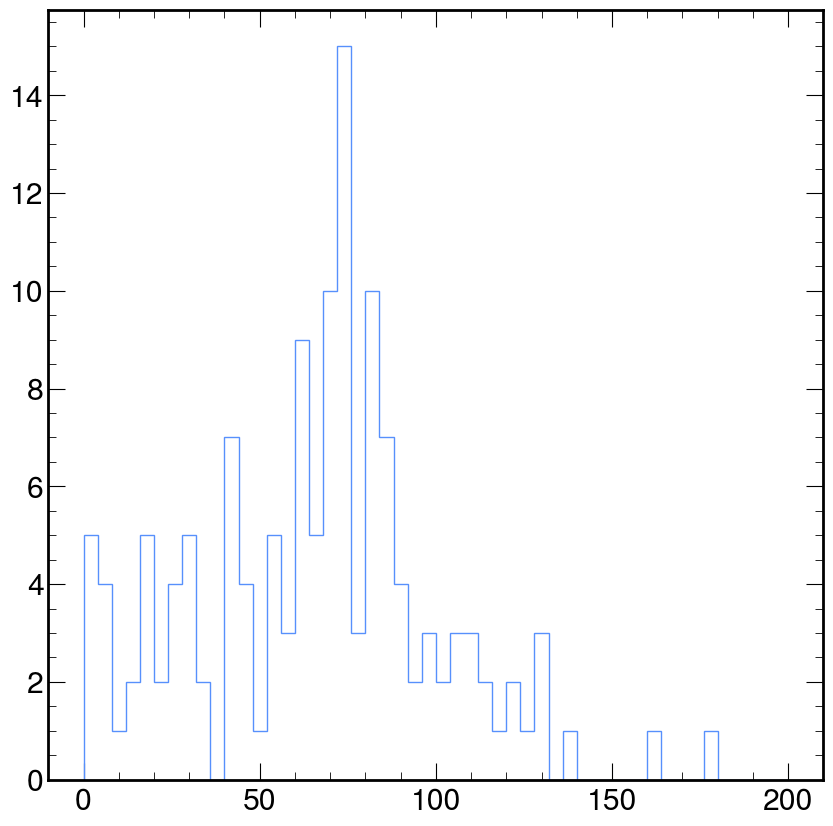

In [ ]:
plt.hist(W_mass, bins=50, range=(0, 200), histtype='step', label='W Mass Distribution')

In [ ]:

# Btag = events["Jet"].BTag
# print(Btag)
# print("Btag length:", len(Btag))
# for i in Btag:
#     print(i)
#     count_ones = countItem(i, 1)
#     print(f"Number of elements equal to 1: {count_ones}")